<a href="https://colab.research.google.com/github/falarion08/Country-Inflation-Prediction/blob/main/ML_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Food Inflation Prediction

##Overview

summary of project goes here

## Data Preparation

This section gives a brief overview of the datasets to be used and combined. It also gives an information on what the the features are present in the dataset.

Importing libraries and the dataset to be used

In [1]:
import numpy as np
import pandas as pd
from itertools import product
import matplotlib.pyplot as plt

In [2]:
#Importing data
api_key = "1nmpTM6gW1HATAVMr7Yd3oAloaj3ycgrAVdS075cujd8"
xlsx = pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{api_key}/export?format=xlsx")

###Importing the first dataset

This data was obtained from: https://microdata.worldbank.org/index.php/catalog/4509/study-description

**Attributes**


*   Open - Monthly food price estimate (open)
*   High - Monthly food price estimate (high)
*   Low - Monthly food price estimate (low)
*   Close - Monthly food price estimate (close)
*   Inflation - Monthly estimate of food price inflation
*   ISO3 - Country code
*   date - Date of estimate (month/day/year)




In [3]:
df1 = pd.read_excel(xlsx, sheet_name='s1')
df1.head()

,Open,High,Low,Close,Inflation,country,ISO3,date
0,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-01-01
1,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-02-01
2,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-03-01
3,0.53,0.55,0.53,0.55,NaN,Afghanistan,AFG,2007-04-01
4,0.56,0.57,0.55,0.57,NaN,Afghanistan,AFG,2007-05-01


###Importing second dataset

In [4]:
url = "https://raw.githubusercontent.com/falarion08/Country-Inflation-Prediction/main/out.csv"
df2 = pd.read_csv(url)

###Merging both dataset

In [5]:
df2.rename(columns={'DATES':'date'}, inplace=True)
df2['date'] = pd.to_datetime(df2['date'])
df1['date'] = pd.to_datetime(df1['date'])


In [ ]:
country_df = pd.merge(df1,df2, on=['date'], how='left')

## Section 1: Exploratory Data

In [ ]:
# Convert 'date' column to datetime
df2['DATES'] = pd.to_datetime(df2['DATES'])
df1['date'] = pd.to_datetime(df1['date'])


In [ ]:
df2.rename(columns={'DATES':'date'}, inplace=True)
country_df = pd.merge(df1, df2, on='date', how='left')


In [ ]:
x  = country_df.isna().sum() / len(country_df)


In [ ]:
x[x <= 0.80]

In [ ]:
z = df2.isna().sum()/len(df2)


In [ ]:
# let's get some basic info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       6977 non-null   float64       
 1   High       6977 non-null   float64       
 2   Low        6977 non-null   float64       
 3   Close      6977 non-null   float64       
 4   Inflation  6545 non-null   float64       
 5   country    7056 non-null   object        
 6   ISO3       7056 non-null   object        
 7   date       7056 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 441.1+ KB


In [ ]:
# then we get the number and type of countries
print('number of countries: '+ str(df['ISO3'].nunique()))
all_countries = df['ISO3'].unique()
print(all_countries)

number of countries: 36
['AFG' 'ARM' 'BDI' 'BFA' 'BGD' 'CAF' 'CMR' 'COD' 'COG' 'GIN' 'GMB' 'GNB'
 'HTI' 'IDN' 'IRQ' 'KEN' 'LAO' 'LBN' 'LBR' 'LBY' 'LKA' 'MLI' 'MMR' 'MOZ'
 'MRT' 'MWI' 'NER' 'NGA' 'PHL' 'SDN' 'SEN' 'SOM' 'SSD' 'SYR' 'TCD' 'YEM']


In [ ]:
df.describe()

,Open,High,Low,Close,Inflation,date
count,6977.000000,6977.000000,6977.000000,6977.000000,6545.000000,7056
mean,1.438302,1.480979,1.399053,1.438630,12.870686,2015-11-27 13:49:47.755101952
min,0.010000,0.010000,0.010000,0.010000,-33.180000,2007-01-01 00:00:00
25%,0.770000,0.790000,0.760000,0.770000,-0.980000,2011-11-01 00:00:00
50%,0.970000,0.980000,0.950000,0.970000,4.910000,2016-01-01 00:00:00
75%,1.100000,1.120000,1.080000,1.100000,15.050000,2020-02-08 06:00:00
max,79.310000,81.390000,73.060000,75.030000,376.620000,2024-03-01 00:00:00
std,4.285945,4.480722,4.092871,4.244524,33.326553,NaN


## NaN Values

In [ ]:
# we get the count of NaN values per country and also their date ranges
nan_dict = {
    'country':[],
    'open_nan':[],
    'high_nan':[],
    'low_nan':[],
    'close_nan':[],
    'inflation_nan':[],
    'total_date':[]
}
nan_df = pd.DataFrame(nan_dict)

row = 0

for country in df['ISO3'].unique():
    nan_df.loc[row,'country'] = country
    nan_df.loc[row,'open_nan'] = df[df['ISO3']==country]['Open'].isna().sum()
    nan_df.loc[row,'high_nan'] = df[df['ISO3']==country]['High'].isna().sum()
    nan_df.loc[row,'low_nan'] = df[df['ISO3']==country]['Low'].isna().sum()
    nan_df.loc[row,'close_nan'] = df[df['ISO3']==country]['Close'].isna().sum()
    nan_df.loc[row,'inflation_nan'] = df[df['ISO3']==country]['Inflation'].isna().sum()
    nan_df.loc[row,'total_date'] = df[df['ISO3']==country]['date'].count()

    row = row + 1

nan_df

,country,open_nan,high_nan,low_nan,close_nan,inflation_nan,total_date
0,AFG,0.0,0.0,0.0,0.0,12.0,207.0
1,ARM,0.0,0.0,0.0,0.0,12.0,195.0
2,BDI,0.0,0.0,0.0,0.0,12.0,207.0
3,BFA,0.0,0.0,0.0,0.0,12.0,207.0
4,BGD,0.0,0.0,0.0,0.0,12.0,207.0
5,CAF,0.0,0.0,0.0,0.0,12.0,207.0
6,CMR,39.0,39.0,39.0,39.0,51.0,207.0
7,COD,0.0,0.0,0.0,0.0,12.0,207.0
8,COG,0.0,0.0,0.0,0.0,12.0,159.0
9,GIN,15.0,15.0,15.0,15.0,27.0,195.0


In [ ]:
# from here we can tell that there are missing NaN values only in the inflation column, locating these we get
# Display rows where 'column_name' is NaN
nan_rows = df[df['Inflation'].isna()]
print("Rows with NaN values in 'column_name':")
print(nan_rows)

Rows with NaN values in 'column_name':
      Open  High   Low  Close  Inflation      country ISO3       date
0     0.53  0.54  0.53   0.53        NaN  Afghanistan  AFG 2007-01-01
1     0.53  0.54  0.53   0.53        NaN  Afghanistan  AFG 2007-02-01
2     0.53  0.54  0.53   0.53        NaN  Afghanistan  AFG 2007-03-01
3     0.53  0.55  0.53   0.55        NaN  Afghanistan  AFG 2007-04-01
4     0.56  0.57  0.55   0.57        NaN  Afghanistan  AFG 2007-05-01
...    ...   ...   ...    ...        ...          ...  ...        ...
6880  0.52  0.52  0.51   0.51        NaN  Yemen, Rep.  YEM 2009-08-01
6881  0.51  0.52  0.51   0.52        NaN  Yemen, Rep.  YEM 2009-09-01
6882  0.53  0.54  0.52   0.53        NaN  Yemen, Rep.  YEM 2009-10-01
6883  0.54  0.54  0.53   0.53        NaN  Yemen, Rep.  YEM 2009-11-01
6884  0.54  0.54  0.53   0.54        NaN  Yemen, Rep.  YEM 2009-12-01

[511 rows x 8 columns]


In [ ]:
# Get indices of rows with NaN values
nan_indices = df[df['Inflation'].isna()].index.tolist()
print("\nIndices of rows with NaN values in the Inflation column:")
print(nan_indices)


Indices of rows with NaN values in the Inflation column:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 182

### NaN Value Summary
1) CMR, GIN, LAO: NaNs in Open, High, Low, Close
2) CMR, GIN, LAO: More inflation NaN than average
3) All others: NaNs in inflation for year 2007

## Missing Dates

In [ ]:
# Generate a list of all countries and a list of all dates

all_dates = pd.date_range(start='2007-01-01', end='2024-03-01', freq='MS')

# Create a DataFrame with all combinations of countries and dates
all_combinations = pd.DataFrame(list(product(all_countries, all_dates)), columns=['ISO3', 'date'])

# Merge the original DataFrame with the DataFrame of all combinations
merged_df = pd.merge(all_combinations, df, on=['ISO3', 'date'], how='outer', indicator=True)

# Identify the rows with missing data by checking the '_merge' column
missing_data = merged_df[merged_df['_merge'] == 'left_only']

# Display the countries with missing dates and the corresponding dates
missing_dates = missing_data[['ISO3', 'date']]
missing_dates

,ISO3,date
207,ARM,2007-01-01
208,ARM,2007-02-01
209,ARM,2007-03-01
210,ARM,2007-04-01
211,ARM,2007-05-01
...,...,...
7264,YEM,2008-08-01
7265,YEM,2008-09-01
7266,YEM,2008-10-01
7267,YEM,2008-11-01


In [ ]:
# let us display which countries have missing dates and when
missing_dates['ISO3'].unique()

array(['ARM', 'COG', 'GIN', 'IRQ', 'LBN', 'LBY', 'MMR', 'SYR', 'YEM'],
      dtype=object)

In [ ]:
missing_dates[missing_dates['ISO3'] == 'ARM'], missing_dates[missing_dates['ISO3'] == 'COG'], missing_dates[missing_dates['ISO3'] == 'GIN'], missing_dates[missing_dates['ISO3'] == 'IRQ'], missing_dates[missing_dates['ISO3'] == 'LBN'], missing_dates[missing_dates['ISO3'] == 'LBY'], missing_dates[missing_dates['ISO3'] == 'MMR'], missing_dates[missing_dates['ISO3'] == 'SYR'], missing_dates[missing_dates['ISO3'] == 'YEM']

(    ISO3       date
 207  ARM 2007-01-01
 208  ARM 2007-02-01
 209  ARM 2007-03-01
 210  ARM 2007-04-01
 211  ARM 2007-05-01
 212  ARM 2007-06-01
 213  ARM 2007-07-01
 214  ARM 2007-08-01
 215  ARM 2007-09-01
 216  ARM 2007-10-01
 217  ARM 2007-11-01
 218  ARM 2007-12-01,
      ISO3       date
 1656  COG 2007-01-01
 1657  COG 2007-02-01
 1658  COG 2007-03-01
 1659  COG 2007-04-01
 1660  COG 2007-05-01
 1661  COG 2007-06-01
 1662  COG 2007-07-01
 1663  COG 2007-08-01
 1664  COG 2007-09-01
 1665  COG 2007-10-01
 1666  COG 2007-11-01
 1667  COG 2007-12-01
 1668  COG 2008-01-01
 1669  COG 2008-02-01
 1670  COG 2008-03-01
 1671  COG 2008-04-01
 1672  COG 2008-05-01
 1673  COG 2008-06-01
 1674  COG 2008-07-01
 1675  COG 2008-08-01
 1676  COG 2008-09-01
 1677  COG 2008-10-01
 1678  COG 2008-11-01
 1679  COG 2008-12-01
 1680  COG 2009-01-01
 1681  COG 2009-02-01
 1682  COG 2009-03-01
 1683  COG 2009-04-01
 1684  COG 2009-05-01
 1685  COG 2009-06-01
 1686  COG 2009-07-01
 1687  COG 2009-08-01


### Missing Date Summary:
1) ARM, GIN, MMR: Missing year 2007
2) YEM: Missing year 2007-2008
3) COG, SYR: Missing year 2007-2010
4) IRQ, LBN: Missing year 2007-2011
5) LBY: Missing year 2007-2016

### Visualizing Trends in Data


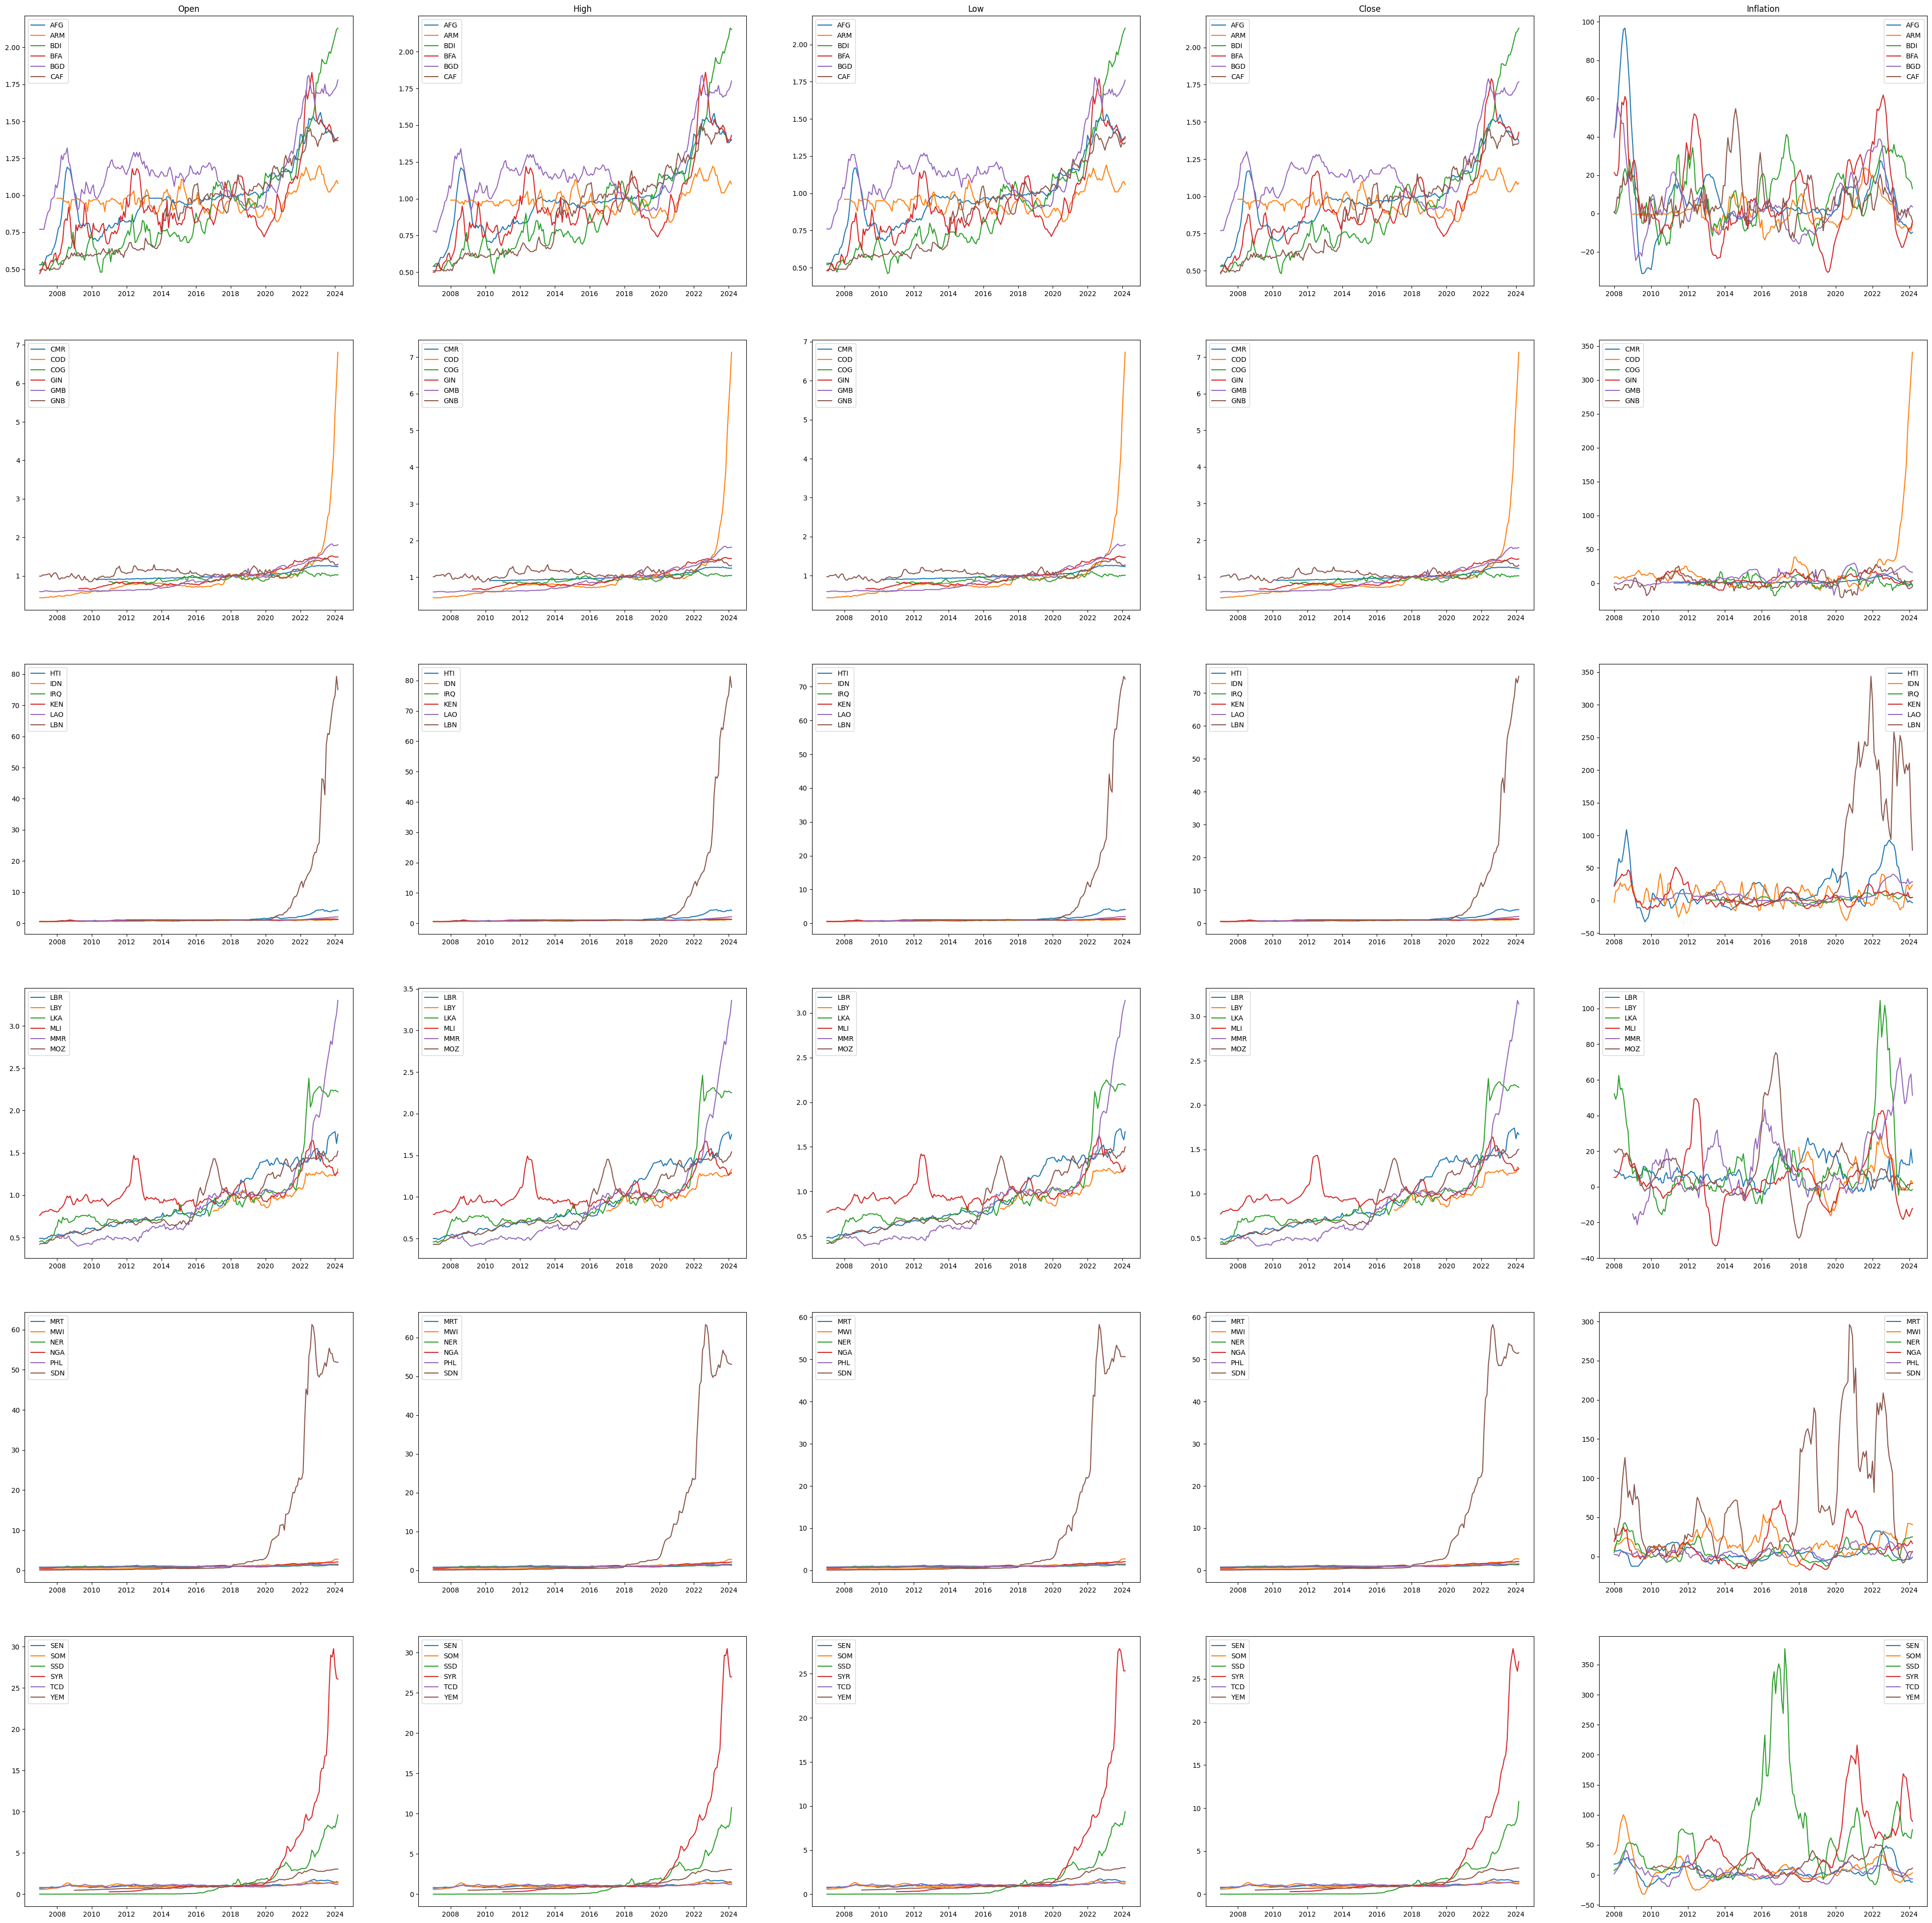

In [ ]:
# Let us plot line plots vs time of the various attributes per country

fig, ax = plt.subplots(6,5, figsize=(50,50))

for i in range(0,6):

  labels = []
  for j in range(0,6):
    country_name = all_countries[i*6 + j]

    ax[i,0].plot(df[df['ISO3'] == country_name]['date'], df[df['ISO3'] == country_name]['Open'], label = country_name)
    ax[i,1].plot(df[df['ISO3'] == country_name]['date'], df[df['ISO3'] == country_name]['High'], label = country_name)
    ax[i,2].plot(df[df['ISO3'] == country_name]['date'], df[df['ISO3'] == country_name]['Low'], label = country_name)
    ax[i,3].plot(df[df['ISO3'] == country_name]['date'], df[df['ISO3'] == country_name]['Close'], label = country_name)
    ax[i,4].plot(df[df['ISO3'] == country_name]['date'], df[df['ISO3'] == country_name]['Inflation'], label = country_name)

  ax[i,0].legend()
  ax[i,1].legend()
  ax[i,2].legend()
  ax[i,3].legend()
  ax[i,4].legend()

ax[0,0].set_title('Open')
ax[0,1].set_title('High')
ax[0,2].set_title('Low')
ax[0,3].set_title('Close')
ax[0,4].set_title('Inflation')

plt.show()

#### Summary of findings
1.   Certain countries have experienced very high levels of food inflation in comparison to the rest (COD, LBN, SDN, SYR)
2.   Almost universally, there is an uptick during the pandemic years
3. Inflation rate is almost always positive (little to no deflation)
4. Countries from the Middle-East which experienced war (Lebanon, Syria, Afghanistan, Iraq) have some of the highest inflation rates



# Section 2: Food Data EDA

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/AY 2023-2024/TERM 3/DATA103/final proj/WLD_RTP_details_2023-10-02.csv')
df2

,country,iso3,components,currency,start_date_observations,end_date_observations,number_of_markets_modeled,number_of_markets_covered,number_of_food_items,number_of_observations_food,...,total_food_price_increase_since_start_date,average_annualized_food_inflation,maximum_food_drawdown,average_annualized_food_volatility,average_monthly_food_price_correlation_between_markets,average_annual_food_price_correlation_between_markets,Rsquared_individual_food_items,Rsquared_individual_other_items,index_confidence_score,imputation_model
0,Afghanistan,AFG,"Bread (1 KG, Index Weight = 1), Rice (Low Qual...",AFN,Jan 2007,Sep 2023,40,40,3,"bread: 2318, rice: 2701, wheat: 2682",...,167.97%,6.06%,-40.67%,7.93%,0.62,0.87,"bread: 0.94, rice: 0.89, wheat: 0.93","exchange_rate_wfp: 1, fuel_diesel: 0.97, wage_...",0.92,"bread: cubist (Andree, 2021), rice: two-stage ..."
1,Burundi,BDI,"Bananas (1 KG, Index Weight = 1), Beans (1 KG,...",BIF,Jan 2007,Aug 2023,72,72,10,"bananas: 5344, beans: 5963, cassava_flour: 594...",...,254.94%,7.86%,-30.77%,12.03%,0.60,0.83,"bananas: 0.88, beans: 0.9, cassava_flour: 0.89...",:,0.90,"bananas: two-stage cubist (Andree and Pape, 20..."
2,Burkina Faso,BFA,"Maize (White) (1 KG, Index Weight = 1), Millet...",XOF,Jan 2007,Jul 2023,64,64,3,"maize: 6615, millet: 7618, sorghum: 7177",...,201.25%,6.81%,-36.7%,13.71%,0.57,0.80,"maize: 0.84, millet: 0.83, sorghum: 0.81",:,0.83,"maize: cubist (Andree, 2021), millet: cubist (..."
3,Central African Republic,CAF,"Cassava (Cossette) (1 KG, Index Weight = 1), M...",XAF,Jan 2007,Jun 2023,42,42,5,"cassava: 2259, maize: 2025, meat_beef: 2147, o...",...,134.62%,5.22%,-24.85%,13.74%,0.39,0.59,"cassava: 0.89, maize: 0.88, meat_beef: 0.95, o...",:,0.89,"cassava: cubist (Andree, 2021), maize: cubist ..."
4,Cameroon,CMR,"Bananas (12 KG, Index Weight = 0.08), Cassava ...",XAF,Apr 2010,Aug 2023,83,83,10,"bananas: 621, cassava: 624, cocoyam: 624, fish...",...,39.02%,2.47%,-2.79%,1.84%,0.25,0.67,"bananas: 0.96, cassava: 0.96, cocoyam: 0.98, f...",:,0.98,"bananas: two-stage cubist (Andree and Pape, 20..."
5,"Congo, Dem. Rep.",COD,"Beans (1 KG, Index Weight = 1), Cassava (Cosse...",CDF,Jan 2007,Jan 2023,86,86,17,"beans: 3310, cassava: 2665, cassava_flour: 325...",...,193.41%,6.64%,-15.73%,6.99%,0.26,0.55,"beans: 0.84, cassava: 0.93, cassava_flour: 0.8...",exchange_rate_wfp: 0.98,0.93,"beans: cubist (Andree, 2021), cassava: two-sta..."
6,"Congo, Rep.",COG,"Beans (White) (1 KG, Index Weight = 1), Cassav...",XAF,Jan 2011,Apr 2022,13,13,4,"beans: 643, cassava_flour: 564, oil: 484, rice...",...,17.06%,1.24%,-8.13%,5.45%,0.19,0.27,"beans: 0.86, cassava_flour: 0.8, oil: 0.79, ri...",:,0.82,"beans: two-stage cubist (Andree and Pape, 2023..."
7,"Gambia, The",GMB,"Apples (Red) (1 KG, Index Weight = 1), Bananas...",GMD,Jan 2007,Jul 2023,28,28,26,"apples: 1556, bananas: 1672, beans: 1668, brea...",...,195.4%,6.68%,-20.83%,7.15%,0.56,0.84,"apples: 0.95, bananas: 0.92, beans: 0.91, brea...","fuel_diesel: 0.98, fuel_petrol_gasoline: 0.98",0.94,"apples: two-stage cubist (Andree and Pape, 202..."
8,Guinea-Bissau,GNB,"Millet (1 KG, Index Weight = 1), Oil (Vegetabl...",XOF,Jun 2007,Aug 2023,45,45,5,"millet: 1011, oil: 1822, rice: 1811, sorghum: ...",...,30.87%,1.62%,-28.04%,11.77%,0.79,0.92,"millet: 0.79, oil: 0.96, rice: 0.93, sorghum: ...",:,0.89,"millet: cubist (Andree, 2021), oil: cubist (An..."
9,Haiti,HTI,"Beans (Black) (1 Marmite, Index Weight = 0.37)...",HTG,Jan 2007,Jun 2023,9,9,8,"beans: 1166, maize_meal: 1727, oil: 1058, past...",...,604.41%,12.36%,-31.98%,11.66%,0.52,0.91,"beans: 0.93, maize_meal: 0.84, oil: 0.96, past...",:,0.95,"beans: two-stage cubist (Andree and Pape, 2023..."


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   country                                                 25 non-null     object 
 1   iso3                                                    25 non-null     object 
 2   components                                              25 non-null     object 
 3   currency                                                25 non-null     object 
 4   start_date_observations                                 25 non-null     object 
 5   end_date_observations                                   25 non-null     object 
 6   number_of_markets_modeled                               25 non-null     int64  
 7   number_of_markets_covered                               25 non-null     int64  
 8   number_of_food_items                      

In [ ]:
# check for any NaN values
df2.isna().sum()

country                                                   0
iso3                                                      0
components                                                0
currency                                                  0
start_date_observations                                   0
end_date_observations                                     0
number_of_markets_modeled                                 0
number_of_markets_covered                                 0
number_of_food_items                                      0
number_of_observations_food                               0
number_of_observations_other                              0
data_coverage_food                                        0
data_coverage_previous_12_months_food                     0
total_food_price_increase_since_start_date                0
average_annualized_food_inflation                         0
maximum_food_drawdown                                     0
average_annualized_food_volatility      

In [ ]:
df2.describe()

,number_of_markets_modeled,number_of_markets_covered,number_of_food_items,average_monthly_food_price_correlation_between_markets,average_annual_food_price_correlation_between_markets,index_confidence_score
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,56.480000,56.480000,9.320000,0.498400,0.775600,0.919600
std,47.682212,47.682212,7.016172,0.184135,0.186192,0.040772
min,9.000000,9.000000,3.000000,0.190000,0.270000,0.820000
25%,24.000000,24.000000,4.000000,0.360000,0.670000,0.890000
50%,42.000000,42.000000,7.000000,0.550000,0.820000,0.930000
75%,79.000000,79.000000,11.000000,0.600000,0.910000,0.950000
max,228.000000,228.000000,26.000000,0.830000,0.990000,0.990000


In [ ]:
# dataframe is less relevant, it contains info on how values in the first dataframe were arrived at

# Section 3: Model Development

Note: Eto ung mga itatry ko hehehe feel free to comment na lang or chat sa dc hehehe since try lang di sure lahat to if magagamit pero eto ung mga naiisip q hehehe

## K-Nearest Neighbors (KNN) Regression

## **Linear Regression**

## **L1 and L2 Regularization**

## SVM

## Regression Trees

## **Random Forest**

## **Gradient Boosting**

# Section 4: Model Evaluation

## MAE

## MSE

# Section 5: Model Explainability

## SHAP